In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Read the CSV file
df = pd.read_csv('project step 2.csv')

# Assuming 'PRICE' is the target variable
target_variable = 'PRICE'

# Extract features and target variable
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso Regressor
lasso_regressor = Lasso(alpha=0.01)  # You may need to tune the alpha parameter

# Fit the Lasso model
lasso_regressor.fit(X_train, y_train)

# Predict on the test set using Lasso
lasso_pred = lasso_regressor.predict(X_test)

# Initialize the XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)

# Fit the XGBoost model
xgb_regressor.fit(X_train, y_train)

# Predict on the test set using XGBoost
xgb_pred = xgb_regressor.predict(X_test)

# Set the weights for the hybrid model
lasso_weight = 0.65
xgb_weight = 0.35

# Combine predictions with weights
hybrid_pred = lasso_weight * lasso_pred + xgb_weight * xgb_pred

# Calculate metrics for the hybrid model
rmse = np.sqrt(mean_squared_error(y_test, hybrid_pred))
rae = mean_absolute_error(y_test, hybrid_pred)
mape = np.mean(np.abs((y_test - hybrid_pred) / y_test)) * 100
rmsle = np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(hybrid_pred), 2)))

# Print the results
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Relative Absolute Error (RAE): {:.2f}".format(rae))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))
print("Root Mean Squared Logarithmic Error (RMSLE): {:.2f}".format(rmsle))


c:\Users\theam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.144e+12, tolerance: 3.303e+09
  model = cd_fast.enet_coordinate_descent(


Root Mean Squared Error (RMSE): 24260.49
Relative Absolute Error (RAE): 13592.08
Mean Absolute Percentage Error (MAPE): 16120.31%
Root Mean Squared Logarithmic Error (RMSLE): 2.08


C:\Users\theam\AppData\Local\Temp\ipykernel_9740\2722885552.py:50: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(hybrid_pred), 2)))


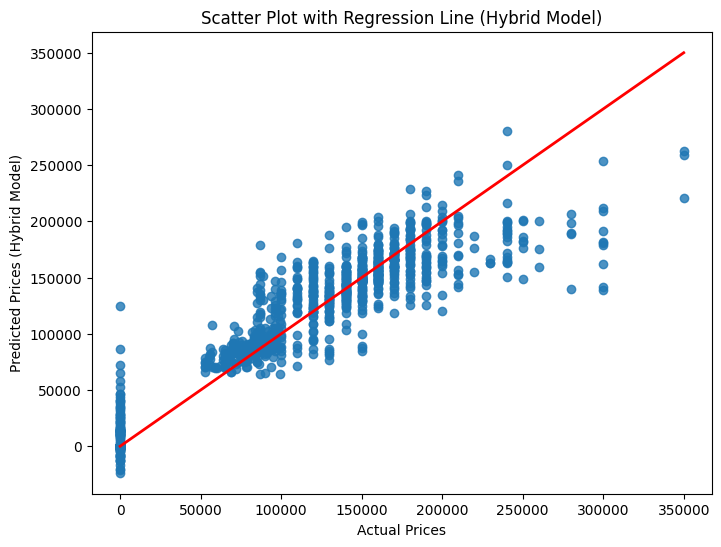

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, hybrid_pred, alpha=0.8)  # Plot actual vs. hybrid model's predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Add regression line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Hybrid Model)")
plt.title("Scatter Plot with Regression Line (Hybrid Model)")
plt.show()


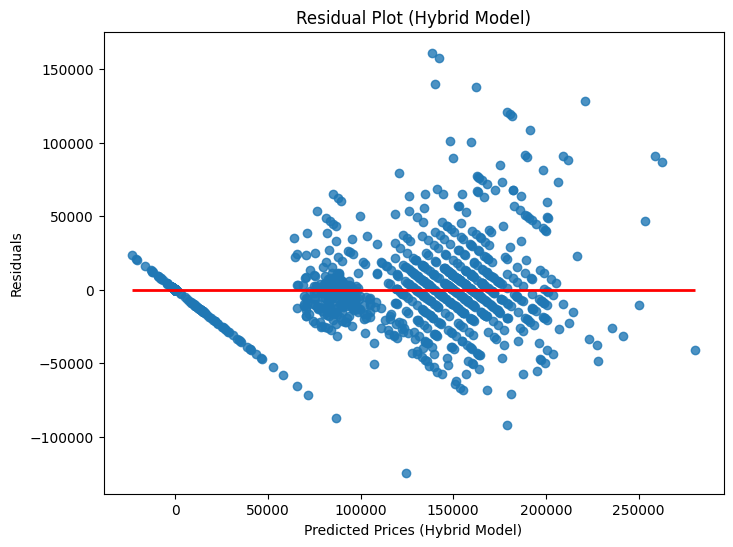

In [3]:
residuals = y_test - hybrid_pred
plt.figure(figsize=(8, 6))
plt.scatter(hybrid_pred, residuals, alpha=0.8)  # Plot residuals vs. hybrid model's predicted values
plt.xlabel("Predicted Prices (Hybrid Model)")
plt.ylabel("Residuals")
plt.title("Residual Plot (Hybrid Model)")
plt.hlines(0, hybrid_pred.min(), hybrid_pred.max(), color='red', linewidth=2)  # Add horizontal line at zero
plt.show()


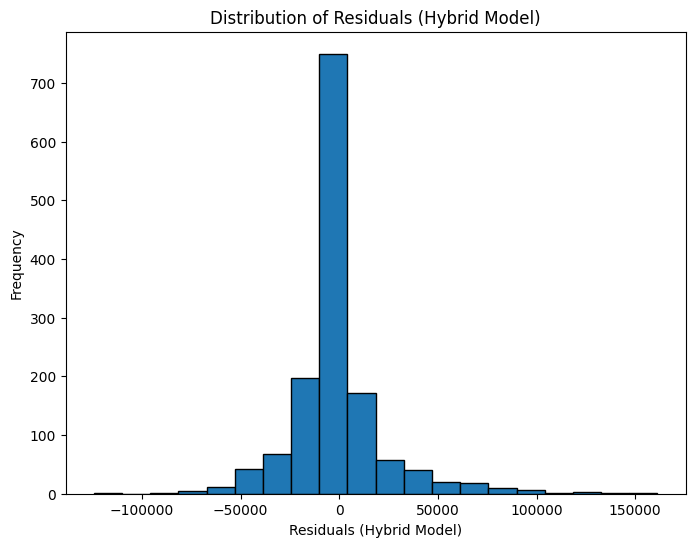

In [4]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')  # Plot histogram of residuals
plt.xlabel("Residuals (Hybrid Model)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Hybrid Model)")
plt.show()
